**The next Paradigm for Modelling and Simulation?**

Integrating Scientific Machine Learning Methods in Co-Simulation Environments

In [10]:
!python3 -m pip install numpy matplotlib jupyterlab ipykernel tqdm 'jax[cpu]'

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


# 2. Modeling and Simulation

# Numerical Simulation using Euler and Midpoint

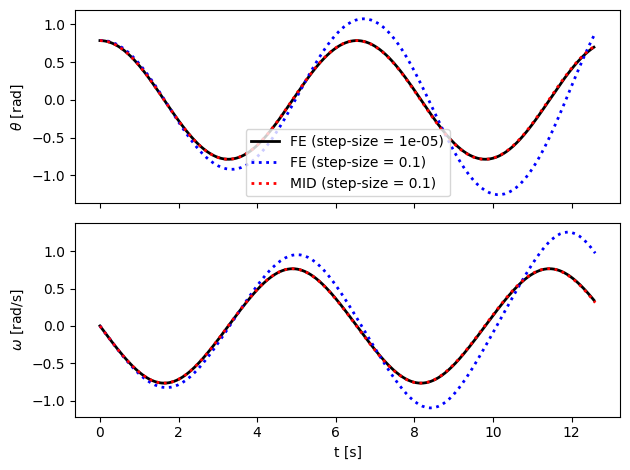

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys


def pendulum_ideal(x):
    g = 1.0  # gravity
    l = 1.0  # pendulum arm length
    θ, ω = x

    dθdt = ω
    dωdt = -(g / l) * np.sin(θ)
    return np.array((dθdt, dωdt))


def run_pendulum_solver():
    step_size_reference = 0.00001
    step_size = 0.1

    t_start = 0.0
    t_end = 4 * np.pi

    # simulate reference
    t_reference = np.arange(t_start, t_end + step_size_reference, step_size_reference)
    x_cur = np.array((np.pi / 4, 00))  # initial state
    xs_reference = [x_cur]

    for _ in t_reference[1:]:
        x_new = x_cur + step_size_reference * pendulum_ideal(x_cur)
        xs_reference.append(x_new)
        x_cur = x_new

    xs_reference = np.stack(xs_reference, axis=1)  # (n_states, n_steps)

    # simulate Euler
    t = np.arange(t_start, t_end + step_size, step_size)

    x_cur = np.array((np.pi / 4, 00))  # initial state
    xs_euler = [x_cur]

    for _ in t[1:]:
        x_new = x_cur + step_size * pendulum_ideal(x_cur)
        xs_euler.append(x_new)
        x_cur = x_new

    xs_euler = np.stack(xs_euler, axis=1)  # (n_states, n_steps)

    # simulate midpoint

    x_cur = np.array((np.pi / 4, 00))  # initial state
    xs_midpoint = [x_cur]

    for _ in t[1:]:
        x_new = x_cur + step_size * pendulum_ideal(
            x_cur + step_size / 2 * pendulum_ideal(x_cur)
        )
        xs_midpoint.append(x_new)
        x_cur = x_new

    xs_midpoint = np.stack(xs_midpoint, axis=1)  # (n_states, n_steps)

    # plotting

    fig, (ax1, ax2) = plt.subplots(2, sharex=True)

    ax1.plot(
        t_reference,
        xs_reference[0],
        label=f"FE (step-size = {step_size_reference})",
        c="black",
        linewidth=2,
    )
    ax1.plot(
        t,
        xs_euler[0],
        label=f"FE (step-size = {step_size})",
        c="blue",
        linestyle="dotted",
        linewidth=2,
    )
    ax1.plot(
        t,
        xs_midpoint[0],
        label=f"MID (step-size = {step_size})",
        c="red",
        linestyle="dotted",
        linewidth=2,
    )
    ax1.set_ylabel(rf"$\theta$ [rad]")
    ax2.plot(t_reference, xs_reference[1], label="reference", c="black", linewidth=2)
    ax2.plot(
        t,
        xs_euler[1],
        c="blue",
        linestyle="dotted",
        linewidth=2,
    )
    ax2.plot(
        t,
        xs_midpoint[1],
        c="red",
        linestyle="dotted",
        linewidth=2,
    )
    ax2.set_ylabel(rf"$\omega$ [rad/s]")
    ax2.set_xlabel("t [s]")
    ax1.legend()
    plt.tight_layout()
    plt.show()




run_pendulum_solver()


# Vector Fields and Phase Portraits

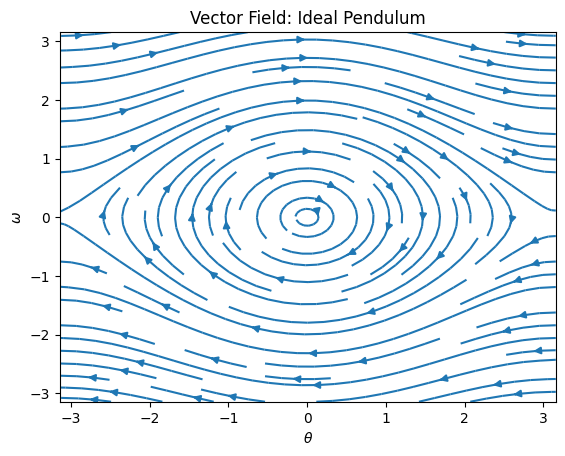

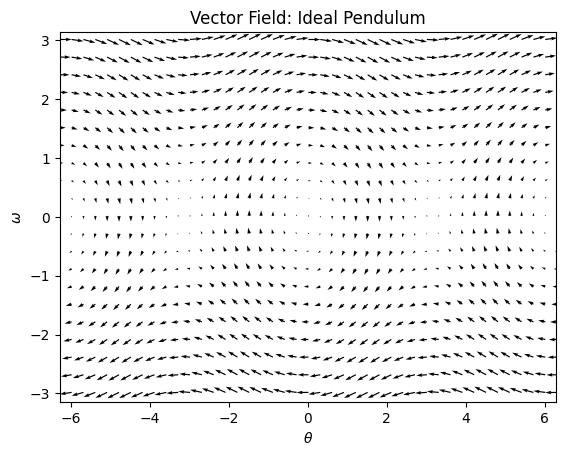

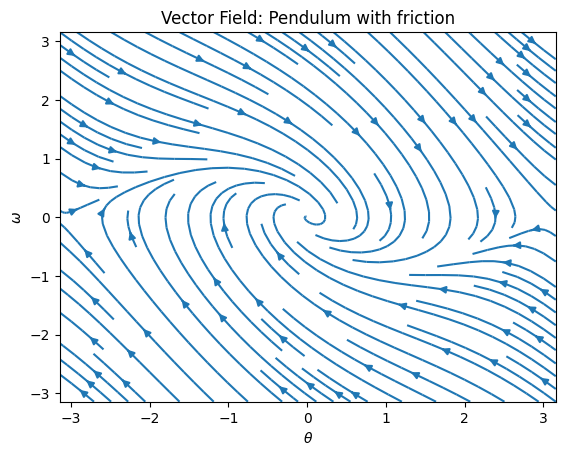

In [7]:
def pendulum_friction(x):
    g = 1.0  # gravity
    l = 1.0  # pendulum arm length
    γ = 1.0  # friction co-efficient
    θ, ω = x

    dθdt = ω
    dωdt = -(g / l) * np.sin(θ) - γ * ω
    return dθdt, dωdt



def run_pendulum_phase():
    mesh_step = 0.3
    θ, ω = np.meshgrid(
        np.arange(-np.pi, np.pi + mesh_step, mesh_step),
        np.arange(-np.pi, np.pi + mesh_step, mesh_step),
    )
    θ_wrapped, ω_wrapped = np.meshgrid(
        np.arange(-2 * np.pi, 2 * np.pi + mesh_step, mesh_step),
        np.arange(-2 * np.pi, 2 * np.pi + mesh_step, mesh_step),
    )

    dθdt_ideal, dωdt_ideal = pendulum_ideal((θ, ω))
    dθdt_ideal_wrapped, dωdt_ideal_wrapped = pendulum_ideal((θ_wrapped, ω_wrapped))
    dθdt_friction, dωdt_friction = pendulum_friction((θ, ω))

    fig, ax = plt.subplots()
    # ax.quiver(θ, ω, dθdt_ideal, dωdt_ideal, angles="xy", scale_units="xy", scale=5)
    ax.streamplot(θ, ω, dθdt_ideal, dωdt_ideal)
    ax.set_xlabel(rf"$\theta$")
    ax.set_ylabel(rf"$\omega$")
    ax.set_title("Vector Field: Ideal Pendulum")

    fig, ax = plt.subplots()
    ax.quiver(
        θ_wrapped,
        ω_wrapped,
        dθdt_ideal_wrapped,
        dωdt_ideal_wrapped,
        angles="xy",
        scale_units="xy",
        scale=10,
    )
    ax.set_xlim(-2 * np.pi, 2 * np.pi)
    ax.set_ylim(-np.pi, np.pi)
    ax.set_xlabel(rf"$\theta$")
    ax.set_ylabel(rf"$\omega$")
    ax.set_title("Vector Field: Ideal Pendulum")

    fig, ax = plt.subplots()
    # ax.quiver(
    #     θ, ω, dθdt_friction, dωdt_friction, angles="xy", scale_units="xy", scale=5
    # )
    ax.streamplot(θ, ω, dθdt_friction, dωdt_friction)
    ax.set_xlabel(rf"$\theta$")
    ax.set_ylabel(rf"$\omega$")
    ax.set_title("Vector Field: Pendulum with friction")
    plt.show()

run_pendulum_phase()

# 3. Scientific Machine Learning

For implementation of Physics-informed NNs and Neural Ordinary Differential Equations we refer to the repository:

https://github.com/clegaard/deep_learning_for_dynamical_systems


# Differentiable Simulator

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:00<00:00, 10239.03it/s]


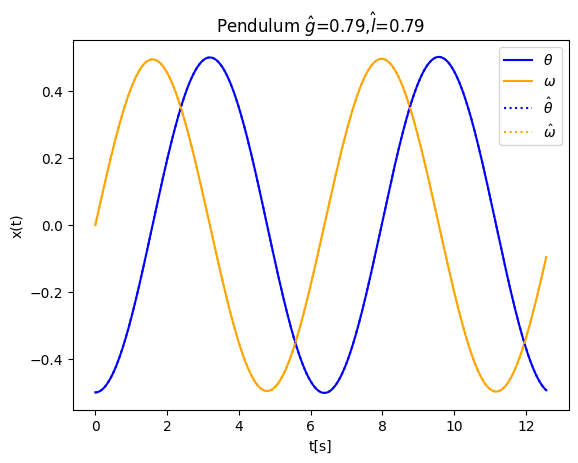

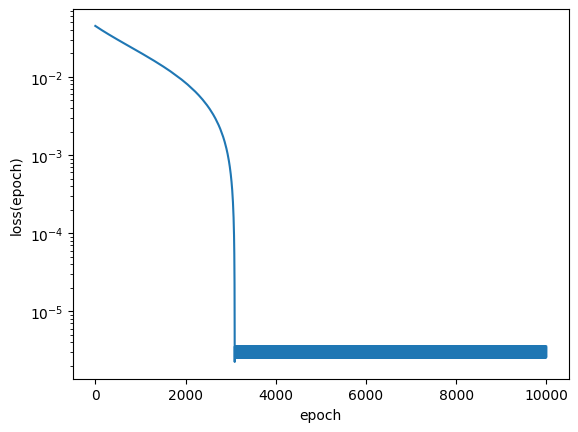

In [12]:
import jax.numpy as jnp
from jax import grad, jit, value_and_grad, vmap, random, tree_map
from jax.lax import scan
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

key = random.PRNGKey(1)


def solve_euler(f, t, y0, *args, **kwargs):
    step_sizes = t[1:] - t[:-1]
    y_cur = y0
    Y = [y_cur]

    for t, step_size in zip(t[1:], step_sizes):
        dydt = f(t, y_cur, *args)
        y_new = y_cur + step_size * dydt
        Y.append(y_new)
        y_cur = y_new

    return jnp.stack(Y, axis=1)


def solve_euler_scan(f, t, y0, *args, **kwargs):
    step_sizes = t[1:] - t[:-1]

    def f_scan(y_cur, t_and_step):
        t, step_size = t_and_step
        dydt = f(t, y_cur, *args)
        y_new = y_cur + step_size * dydt
        return y_new, y_new

    _, Y = scan(f_scan, init=y0, xs=(t[1:], step_sizes))
    Y = jnp.concatenate((y0.reshape(-1, 1), Y.T), axis=1)
    return Y


def f(t, x, params):
    θ, ω = x
    dθdt = ω
    dωdt = -params["g"] / params["l"] * jnp.sin(θ)
    return jnp.array((dθdt, dωdt))


def run_parameter_estimation():
    h = 0.001
    t_train_start = 0.0
    t_train_end = h
    t_train = jnp.arange(t_train_start, t_train_end + h, h)
    t_validation_start = t_train_start
    t_validation_end = 4 * jnp.pi
    t_validation = jnp.arange(t_validation_start, t_validation_end + h, h)

    x0 = jnp.array((-0.5, 0.0))

    solve_euler_scan_grid = vmap(solve_euler_scan, (None, None, 0, None))

    res = 0.1

    θ_grid, ω_grid = jnp.meshgrid(
        jnp.arange(-jnp.pi, jnp.pi + res, res),
        jnp.arange(-jnp.pi, jnp.pi + res, res),
    )
    θ_grid = θ_grid.reshape(-1)
    ω_grid = ω_grid.reshape(-1)
    x0_grid = jnp.stack((θ_grid, ω_grid), axis=1)

    def update(x_target, t, x0, params):
        def loss(params):
            y_predicted = solve_euler_scan(f, t, x0, params)
            return jnp.linalg.norm(x_target - y_predicted)

        loss, grads = value_and_grad(loss)(params)

        params = tree_map(lambda p, g: p - lr * g, params, grads)
        return loss, params

    def update_grid(x_target, t, x0, params):
        def loss(params):
            y_predicted = solve_euler_scan_grid(f, t, x0, params)
            return jnp.linalg.norm(x_target - y_predicted)

        loss, grads = value_and_grad(loss)(params)

        params = tree_map(lambda p, g: p - lr * g, params, grads)
        return loss, params

    parameters_true = {"g": 1.0, "l": 1.0}
    parameters_estimated = {"g": 1.0, "l": 0.5}

    x_true_grid = solve_euler_scan_grid(f, t_train, x0_grid, parameters_true)

    n_epochs = 10000
    lr = 0.001  # learning rate
    losses = []

    update = jit(update_grid)

    for _ in tqdm(range(n_epochs)):
        # value, parameters_estimated = update(x_true, t, x0, parameters_estimated)
        value, parameters_estimated = update(
            x_true_grid, t_train, x0_grid, parameters_estimated
        )
        losses.append(value)

    x_true_validation = solve_euler_scan(f, t_validation, x0, parameters_true)
    x_predicted_validation = solve_euler_scan(f, t_validation, x0, parameters_estimated)

    fig, ax = plt.subplots()
    ax.plot(t_validation, x_true_validation[0], label=rf"$\theta$", color="blue")
    ax.plot(t_validation, x_true_validation[1], label=rf"$\omega$", color="orange")
    ax.plot(
        t_validation,
        x_predicted_validation[0],
        label=rf"$\hat{{\theta}}$",
        color="blue",
        linestyle="dotted",
    )
    ax.plot(
        t_validation,
        x_predicted_validation[1],
        label=rf"$\hat{{\omega}}$",
        color="orange",
        linestyle="dotted",
    )
    ax.set_xlabel("t[s]")
    ax.set_ylabel("x(t)")
    ax.legend()
    ax.set_title(
        rf"Pendulum $\hat{{g}}$={parameters_estimated['g']:.2f},$\hat{{l}}$={parameters_estimated['l']:.2f}"
    )

    fig, ax = plt.subplots()
    ax.semilogy(losses)
    ax.set_xlabel("epoch")
    _ = ax.set_ylabel("loss(epoch)")

    plt.show()



def run_phase_plot():
    res = 0.1
    g = 1.0
    l = 1.0
    xx, yy = jnp.meshgrid(
        jnp.arange(-jnp.pi, jnp.pi + res, res),
        jnp.arange(-jnp.pi, jnp.pi + res, res),
    )

    dx, dy = f((xx, yy), g, l)

    fig, ax = plt.subplots()

    xx = np.asarray(xx)
    yy = np.asarray(yy)

    ax.streamplot(xx, yy, dx, dy)
    ax.set_xlabel("θ")
    ax.set_ylabel("ω")

    plt.show()



run_parameter_estimation()


# 4. Co-Simulation

In [1]:
import numpy as np
from numpy import cos
import matplotlib.pyplot as plt
from copy import deepcopy

from dataclasses import dataclass


class Controller:
    def step(self, communication_step_size, robot: "Robot"):
        error = self.θ_setpoint - robot.θ

        if self.error_last is not None:
            error_derivative = (self.error_last - error) / communication_step_size
        else:
            error_derivative = 0.0

        self.u = (
            self.kp * error + self.ki * self.error_integral + self.kd * error_derivative
        )
        self.error_integral += error * communication_step_size
        self.error_last = error

    def __init__(self, kp, ki, kd, θ_setpoint, robot: "Robot"):
        error = θ_setpoint - robot.θ
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.θ_setpoint = θ_setpoint
        self.error_last = error
        self.error_integral = 0.0
        self.u = self.kp * error


@dataclass
class Robot:
    def step(self, communication_step_size, controller: Controller):
        t_elapsed = 0.0

        while t_elapsed < communication_step_size:
            dθdt = self.ω
            dωdt = (
                self.K * self.i
                - self.b * self.ω
                - self.m * self.g * self.l * cos(self.θ)
            ) / self.J
            didt = (
                controller.u * self.V_abs - self.R * self.i - self.K * self.ω
            ) / self.L

            self.θ = self.θ + self.internal_step_size * dθdt
            self.ω = self.ω + self.internal_step_size * dωdt
            self.i = self.i + self.internal_step_size * didt

            t_elapsed += self.internal_step_size
            self._internal_θ = (
                [self.θ] if self._internal_θ is None else self._internal_θ + [self.θ]
            )

            if self._internal_t is None:
                self._internal_t = [t_elapsed]
            else:
                self._internal_t = self._internal_t + [
                    self._internal_t[-1] + self.internal_step_size
                ]

        assert (
            t_elapsed == communication_step_size
        ), f"unable to step for exactly {communication_step_size} "

    θ: float  # angle
    ω: float  # velocity
    i: float  # current
    V_abs = 12.0
    K = 7.45  # torque coefficient
    g = 9.81  # gravitational acceleration
    b = 5.0  # motor shaft friction
    m = 5.0  # mass of joint
    R = 0.15  # electrical resistance ?
    L = 0.036  # motor inductance
    l = 1.0  # length of joint
    J = 0.5 * (m * l**2)  # moment of intertia
    internal_step_size = 1 / 1024
    _internal_θ = None
    _internal_t = None


def run_cosim_for(controller: Controller, robot: Robot, t):
    communication_step_sizes = t[1:] - t[:-1]

    θs = [robot.θ]
    ts = [0.0]

    for communication_step_size in communication_step_sizes:
        controller_cur = deepcopy(controller)

        controller.step(communication_step_size, robot)

        robot.step(communication_step_size, controller_cur)

    θs += robot._internal_θ
    ts += robot._internal_t
    return ts, θs


def run():
    t_start = 0.0
    t_end = 10.0
    communication_step_size = 1 / 1024
    communication_step_size_coarse = 1 / 8  # 1.0

    t = np.arange(t_start, t_end + communication_step_size, communication_step_size)
    t_coarse = np.arange(
        t_start, t_end + communication_step_size_coarse, communication_step_size_coarse
    )

    robot = Robot(θ=0.0, ω=0.0, i=0.0)
    controller = Controller(kp=1.0, ki=0.1, kd=-0.01, θ_setpoint=1.0, robot=robot)

    t_internal, θ_internal = run_cosim_for(controller, deepcopy(robot), t)
    t_internal_coarse, θ_internal_coarse = run_cosim_for(
        controller, deepcopy(robot), t_coarse
    )

    fig, ax = plt.subplots()
    ax.axhline(controller.θ_setpoint, label="setpoint", color="red", linestyle="dotted")
    ax.plot(t_internal, θ_internal, label=r"$h_{internal} = h_{communication}$")
    ax.plot(
        t_internal_coarse,
        θ_internal_coarse,
        label=f"$h_{{communication}}={communication_step_size_coarse}$",
    )
    ax.set_xlabel("t [s]")
    ax.set_ylabel("$\\theta(t)$")
    plt.legend()
    plt.tight_layout()
    plt.show()

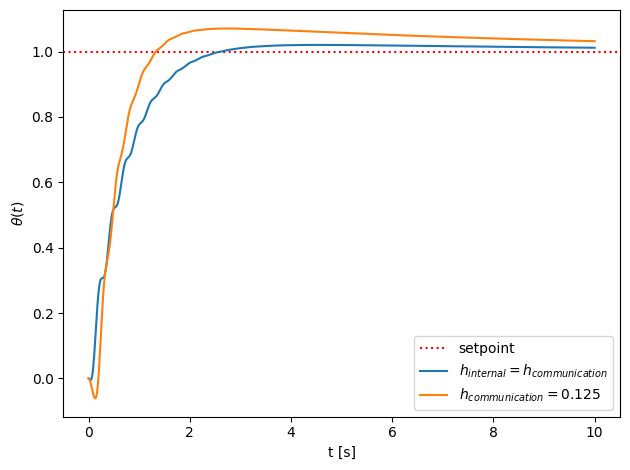

In [2]:
run()